In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime
import seaborn as sns

In [2]:
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 시작날짜
start = datetime.datetime(2010, 1, 1)
# 종료날짜
end = datetime.datetime(2020, 12, 31)

In [4]:
# 삼성전자 주식 데이터를 가져온다.
slb = data.DataReader('005930.KS', 'yahoo', start, end)
slb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13192.374023
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13404.367188
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13714.202148
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13257.604492
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13388.059570
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,72085.835938
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75890.093750
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76768.000000


In [5]:
# 파일로 저장한다.
slb.to_csv('ss_stock.csv')

In [6]:
cel = pd.read_csv('ss_stock.csv', index_col='Date')
cel

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13192.374023
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13404.367188
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13714.202148
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13257.604492
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13388.059570
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,72085.835938
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75890.093750
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76768.000000


In [7]:
# 인덱스의 데이터 타입을 확인한다.
cel.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
       '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30'],
      dtype='object', name='Date', length=2708)

In [8]:
# 컬럼들의 데이터 타입을 확인한다.
cel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2708 non-null   float64
 1   Low        2708 non-null   float64
 2   Open       2708 non-null   float64
 3   Close      2708 non-null   float64
 4   Volume     2708 non-null   float64
 5   Adj Close  2708 non-null   float64
dtypes: float64(6)
memory usage: 148.1+ KB


In [9]:
# 인덱스를 날짜 타입으로 변환하여 다시 설정한다.
cel.index = pd.to_datetime(cel.index, format='%Y-%m-%d')
cel.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)

In [10]:
# 문자열 형태로 되어 있는 날짜를 날짜 형태로 변환하는 람다식
parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d')

In [11]:
cel2 = pd.read_csv('ss_stock.csv', index_col='Date', date_parser=parser)
cel2.index

<ipython-input-10-6d18be0dc20d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d')


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)

### 주식 데이터 확인

In [12]:
# 데이터 프레임의 요약정보 확인
cel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2708 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2708 non-null   float64
 1   Low        2708 non-null   float64
 2   Open       2708 non-null   float64
 3   Close      2708 non-null   float64
 4   Volume     2708 non-null   float64
 5   Adj Close  2708 non-null   float64
dtypes: float64(6)
memory usage: 148.1 KB


In [13]:
# 결측치 확인
cel.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### 일별 수익률 계산

In [14]:
cel_daily = cel.Close.pct_change()
cel_daily

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2020-12-23    0.022130
2020-12-24    0.052774
2020-12-28    0.011568
2020-12-29   -0.005083
2020-12-30    0.034483
Name: Close, Length: 2708, dtype: float64

In [15]:
# 수익률이 0 미만인 데이터의 수를 구한다
# 주가가 떨어진것(주식 가격이 전날에 비해 - 인 경우)
a1 = cel_daily < 0
a1.sum()

1250

삼성전자 주가는 총 2708일 중 1250일이 하락하였다.

### 종가 금액만 추출

In [16]:
cel_close = cel['Close']
cel_close

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 2708, dtype: float64

In [17]:
# 종가 금액의 요약 통계 정보를 확인한다.
cel_des = cel_close.describe(percentiles=[0.1, 0.9])
cel_des

count     2708.000000
mean     33107.289513
std      13460.387890
min      13600.000000
10%      16860.000000
50%      28180.000000
90%      51900.000000
max      81000.000000
Name: Close, dtype: float64

<AxesSubplot:>

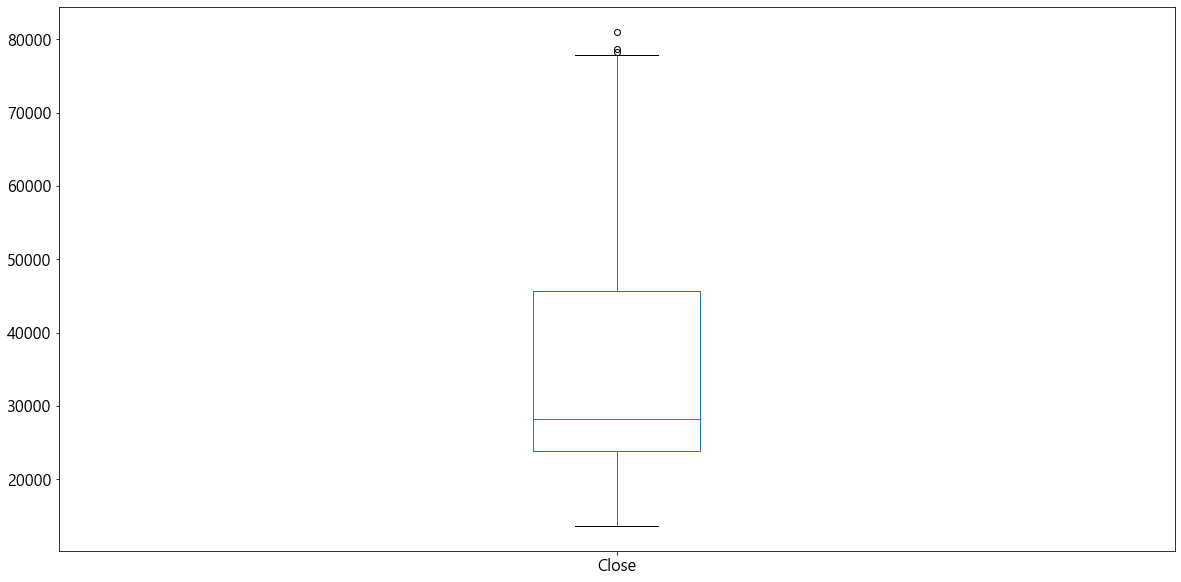

In [18]:
cel_close.plot.box()

### 데이터 시각화

#### 종가 금액에 대한 그래프 색을 검정색으로 해서 그래프를 그린다.
- x 축은 일자, y 축은 금액으로 처리

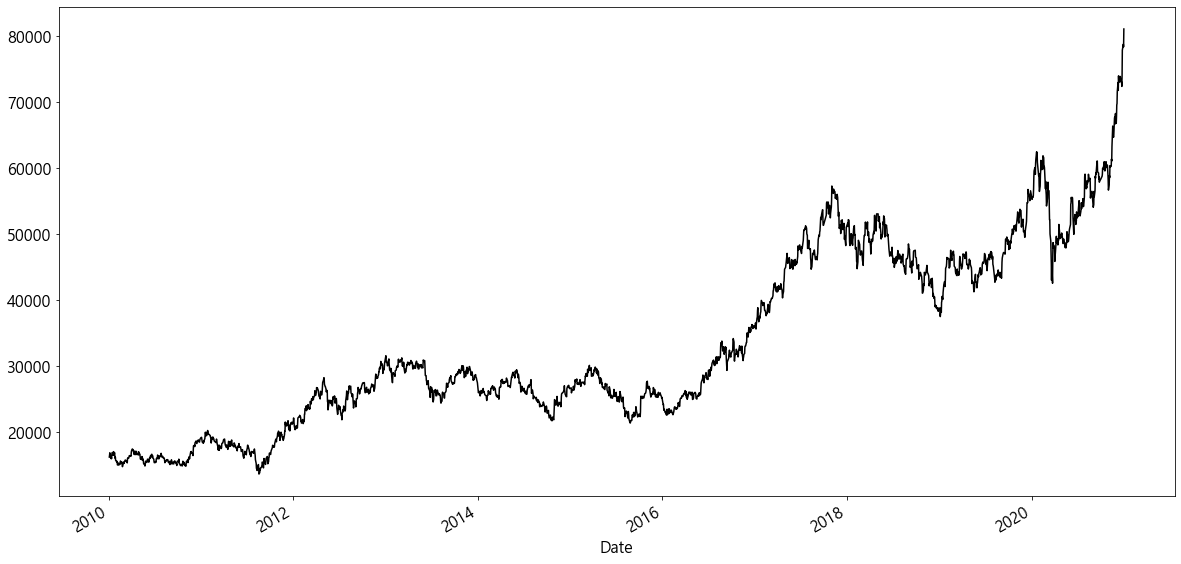

In [19]:
cel_close.plot(color='black')
plt.show()

#### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 하나의 별도 그래프를 그려서 별도의 모양과 색을 처리한다.

In [20]:
# 요약 통계 정보를 가져온다.
cel_des = cel_close.describe(percentiles=[0.1, 0.9])
cel_des

count     2708.000000
mean     33107.289513
std      13460.387890
min      13600.000000
10%      16860.000000
50%      28180.000000
90%      51900.000000
max      81000.000000
Name: Close, dtype: float64

In [21]:
# 10% 이하의 값들
a1 = cel_close < cel_des.loc['10%']
a1

Date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2020-12-23    False
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
Name: Close, Length: 2708, dtype: bool

In [22]:
# 90% 초과 값
a2 = cel_close > cel_des.loc['90%']
a2

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2020-12-23     True
2020-12-24     True
2020-12-28     True
2020-12-29     True
2020-12-30     True
Name: Close, Length: 2708, dtype: bool

In [23]:
# 10% 미안, 90% 초과인 것들을 동시에 가져온다.
cel_top_bottom = cel_close[(a1 | a2)]
cel_top_bottom

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 539, dtype: float64

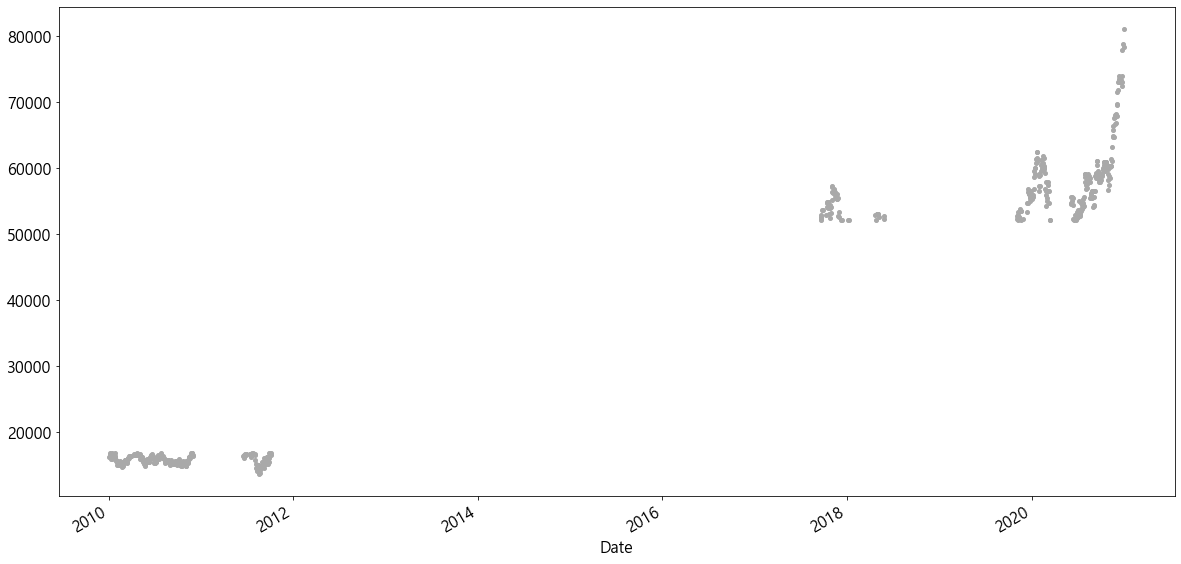

In [24]:
# 시각화 한다.
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()

### 그래프 내에 하일라이트 선 그리기

- 상위(90%), 하위(10%) 선을 그리기 위해 상위와 하위의 x 축 일자를 가져온다.

In [32]:
a1 = cel_close < cel_des.loc['10%']
a2 = cel_close > cel_des.loc['90%']

criteria = a1 | a2
criteria

Date
2010-01-04    True
2010-01-05    True
2010-01-06    True
2010-01-07    True
2010-01-08    True
              ... 
2020-12-23    True
2020-12-24    True
2020-12-28    True
2020-12-29    True
2020-12-30    True
Name: Close, Length: 2708, dtype: bool

In [33]:
criteria.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)

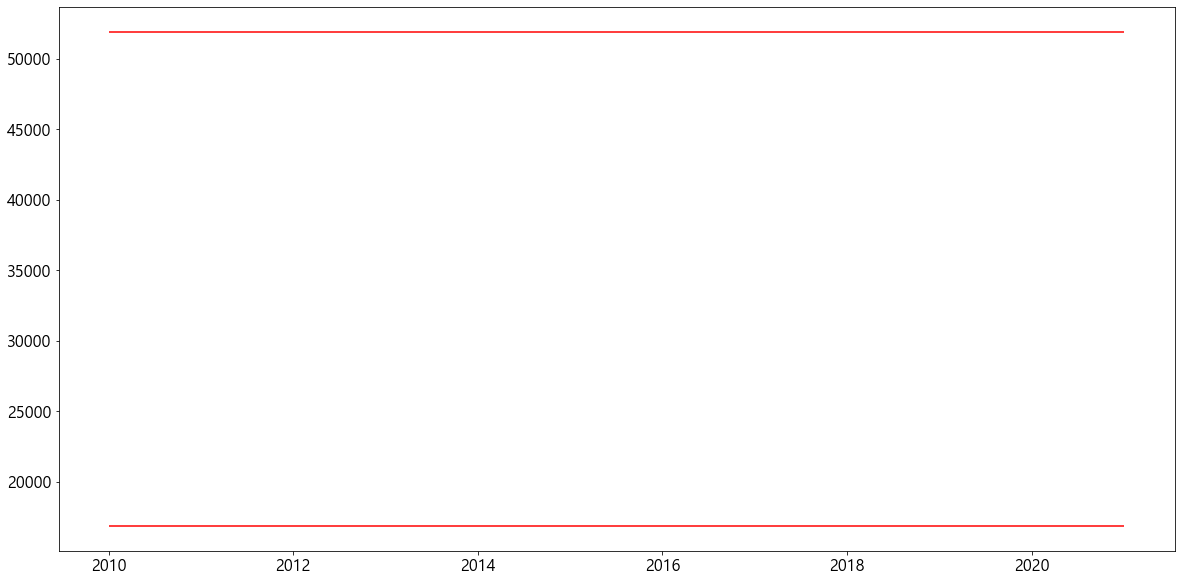

In [34]:
# 선을 그리기 위해 y 축을 10%, 90%의 위치를 지정하고 x축이 시작점과 종료점으로 셋팅
plt.hlines(y = [cel_des.loc['10%'], cel_des.loc['90%']],
           xmin = criteria.index[0], xmax = criteria.index[-1],
          color='red')
plt.show()

### 위에서 그렸던 그래프 3가지를 겹쳐서 그린다.

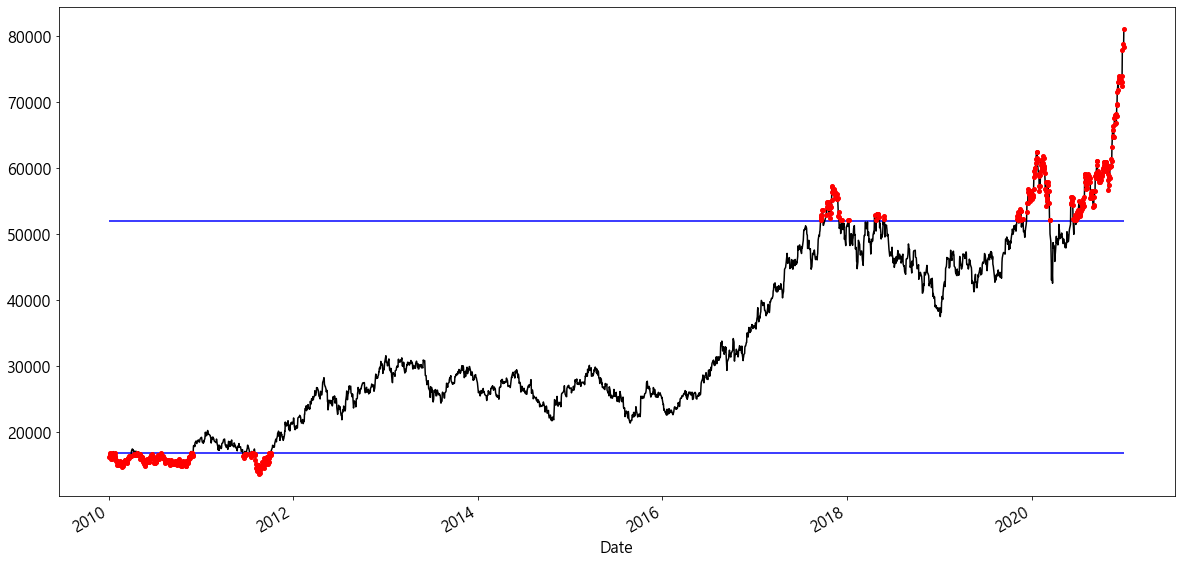

In [39]:
# 종가 그래프
cel_close.plot(color='black')
# 상위와 하위 지점에 점을 찍는다.
cel_top_bottom.plot(marker='o', style=' ', ms=4, color='red')
# 10%, 90% 위치에 하일라이트 선을 그린다.
plt.hlines(y = [cel_des.loc['10%'], cel_des.loc['90%']],
           xmin=criteria.index[0], xmax=criteria.index[-1], color='blue')

plt.show()

### 수익률 비교

In [40]:
# 수익률 비교하기
# pct_change : 현재 원소와 직전 원소간의 % 변화율 계산
cel.Close.head()

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
Name: Close, dtype: float64

In [43]:
# 첫 번째와 두 번째의 차이를 구해본다.
round((cel.Close[1] - cel.Close[0]) / cel.Close[0], 6)

0.016069

In [44]:
cel.Close.pct_change()

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2020-12-23    0.022130
2020-12-24    0.052774
2020-12-28    0.011568
2020-12-29   -0.005083
2020-12-30    0.034483
Name: Close, Length: 2708, dtype: float64

### 결측치처리

In [46]:
cel_pct_change = cel.Close.pct_change()
cel_pct_change

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2020-12-23    0.022130
2020-12-24    0.052774
2020-12-28    0.011568
2020-12-29   -0.005083
2020-12-30    0.034483
Name: Close, Length: 2708, dtype: float64

In [47]:
# 결측치 확인
cel_pct_change.isna().sum()

1

In [49]:
# 결측치 처리
cel_pct_change = cel_pct_change.dropna()
cel_pct_change.isna().sum()

0

### 수익률에 대한 히스토그램

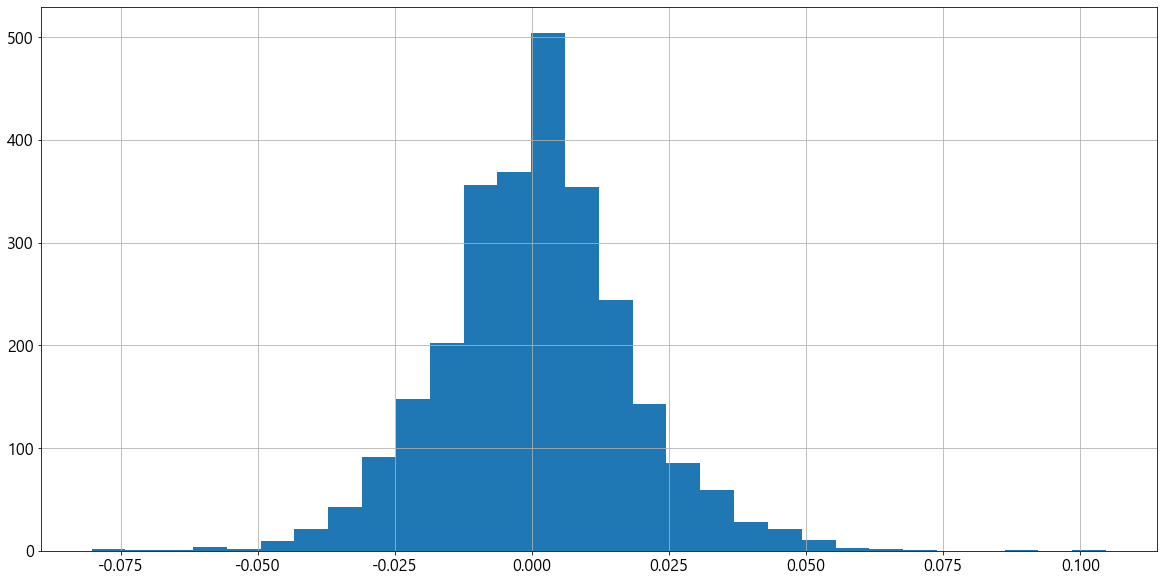

In [57]:
cel_pct_change.hist(bins=30)
plt.show()

### 통계량 보기

### 첨도
- 첨도 (Kurtosis) : 첨도는 분포의 꼬리부분의 길이와 중앙 부분의 표족함에 대한 정보를 제공하는 통계량
- 첨도는 잘 정의된 통계량이 아니기 때문에 논라의 여지가 있는 통계량이다.
- 정규분포의 첨도는 0이다(정규분포는 3값이 나오지만, 첨도를 0으로 만들기위해 3을 빼준다)
- 첨도가 0보다 크면 정규 분포보다 긴 꼬리를 갖고, 분포가 보다 중앙 부분에 덜 집중 되어 있다.(뾰족하다)
-

In [58]:
cel_daily.kurt()

1.5544292402894202

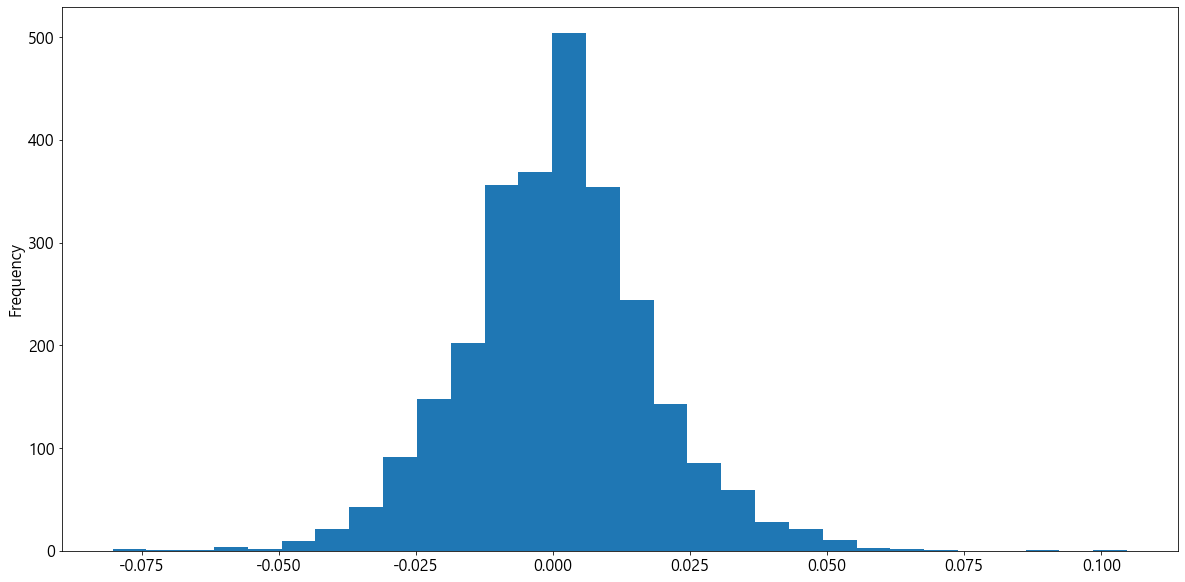

In [59]:
cel_daily.plot.hist(bins=30)
plt.show()

### 왜도
- 분포의 비대칭 정도를 나나내느 통계이다.
- 분표가 완전 대칭인 경우에는 왜도가 0이다.
- 왼쪽으로 긴 꼬리를 가지면 왜도는 음수이고 오른쪽으로 긴 꼬리를 가지면 왜도는 양수이다.
- 비대칭 정도가 심할 수록 왜도의 절대값이 증가한다.

In [60]:
cel_daily.skew()

0.1538558051136132

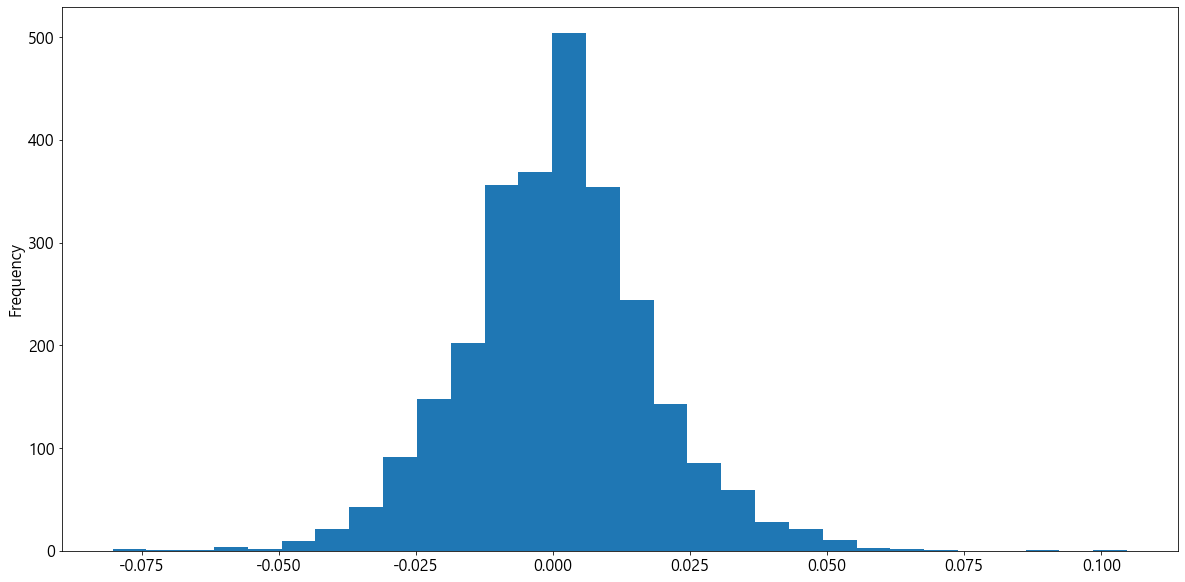

In [61]:
cel_daily.plot.hist(bins=30)
plt.show()